# Problem 1: Scheduling TV Commercials to Maximize Impact
## Algorithmic Strategy: Greedy (Job Sequencing)

## ***Problem Description***

You are given a list of commercials, each with a deadline (minute) and revenue (in ₹ lakhs).
You must schedule non-overlapping ads (1 ad per minute) to maximize total revenue while ensuring each ad runs before its deadline.

In [ ]:
!pip install memory-profiler

## Step 1: Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import profile
import time

##Step 2: Input Data - List of commercials (Ad ID, Deadline, Revenue in lakhs)

In [ ]:
ads = [
    ('A1', 2, 60),
    ('A2', 1, 100),
    ('A3', 3, 20),
    ('A4', 2, 40),
    ('A5', 1, 20),
    ('A6', 3, 70),
    ('A7', 2, 50)
]

In [ ]:
print("Input Ads (Ad ID, Deadline, Revenue):")
for ad in ads:
    print(ad)

Input Ads (Ad ID, Deadline, Revenue):
('A1', 2, 60)
('A2', 1, 100)
('A3', 3, 20)
('A4', 2, 40)
('A5', 1, 20)
('A6', 3, 70)
('A7', 2, 50)


## Step 3: Define Scheduling Function (Greedy Job Sequencing)

In [ ]:
def schedule_ads(ads):
    ads.sort(key=lambda x: x[2], reverse=True)

    # Find the maximum deadline among all ads
    max_deadline = max(ad[1] for ad in ads)

    # Initialize empty slots (None = available)
    slots = [None] * max_deadline

    total_revenue = 0
    scheduled_ads = []

    # Greedy selection: schedule each ad in the latest free slot before its deadline
    for ad in ads:
        ad_id, deadline, revenue = ad
        for j in range(deadline - 1, -1, -1):
            if slots[j] is None:
                slots[j] = ad_id
                total_revenue += revenue
                scheduled_ads.append(ad_id)
                break

    return scheduled_ads, total_revenue


## Step 4: Execution and Timing

In [ ]:
start_time = time.time()
scheduled_ads, total_revenue = schedule_ads(ads)
end_time = time.time()

## Step 5: Display Results

In [ ]:
print("\nScheduled Ads:", scheduled_ads)
print("Total Revenue (in lakhs):", total_revenue)
print("Execution Time: {:.6f} seconds".format(end_time - start_time))


Scheduled Ads: ['A2', 'A6', 'A1']
Total Revenue (in lakhs): 230
Execution Time: 0.000110 seconds


## Step 6: Visualization – Number of Ads Scheduled vs. Revenue

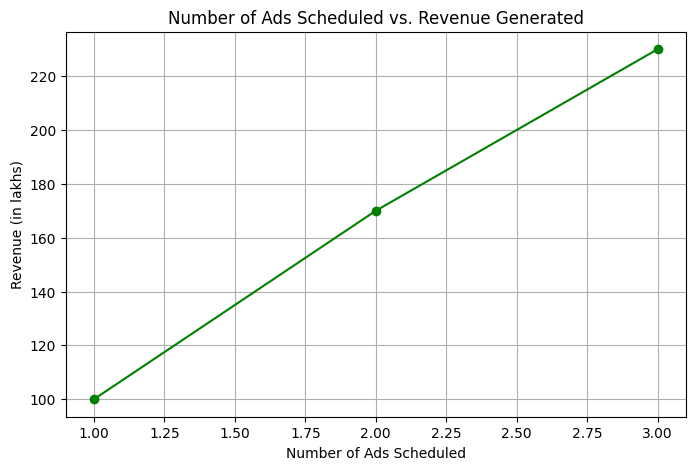

In [ ]:
ads_count = list(range(1, len(scheduled_ads) + 1))
revenues = []
cumulative = 0

for ad_id in scheduled_ads:
    # Find revenue of the scheduled ad from dataset
    revenue = next(val[2] for val in ads if val[0] == ad_id)
    cumulative += revenue
    revenues.append(cumulative)

plt.figure(figsize=(8, 5))
plt.plot(ads_count, revenues, marker='o', linestyle='-', color='green')
plt.title("Number of Ads Scheduled vs. Revenue Generated")
plt.xlabel("Number of Ads Scheduled")
plt.ylabel("Revenue (in lakhs)")
plt.grid(True)
plt.show()


## Observation Of Graph

1. The curve increases rapidly at first, meaning that scheduling the top few high-revenue ads (like A2 and A6) leads to a large jump in total revenue.

2. After the first few ads, the curve starts to flatten, showing diminishing returns — adding less profitable ads contributes smaller increases.

3. The graph is monotonically increasing (never decreases) because every new ad added increases the total revenue.

4. The curve’s shape resembles a concave upward trend, indicating that the greedy algorithm captures most of the possible revenue early on.

# Step 7: Analysis

In [ ]:
print("\n--- Algorithm Analysis ---")
print("Approach Used: Greedy Job Sequencing")
print("Time Complexity: O(n * d)  (n = number of ads, d = max deadline)")
print("Space Complexity: O(d)")
print("Real-world Constraints: Ad runtime, limited slots, priority clients, dynamic pricing, etc.")


--- Algorithm Analysis ---
Approach Used: Greedy Job Sequencing
Time Complexity: O(n * d)  (n = number of ads, d = max deadline)
Space Complexity: O(d)
Real-world Constraints: Ad runtime, limited slots, priority clients, dynamic pricing, etc.
